# Problem Statement:

The aim of this project is to develop a machine learning model that predicts the risk of SARS-CoV-2 infection in individuals based on simple features,  such as clinical symptoms, which can be accessed by asking basic questions. The model can be implemented globally for effective screening and prioritization of testing for the virus in the general population.

# Dataset Description:

A. Basic information: 

1. ID (Individual ID)

2. Sex (male/female). 

3. Age ≥60 above years (true/false) 

4. Test date (date when tested for COVID)


B. Symptoms: 

5. Cough (true/false).

6. Fever (true/false). 

7. Sore throat (true/false). 

8. Shortness of breath (true/false). 

9. Headache (true/false). 


C. Other information: 

10. Known contact with an individual confirmed to have COVID-19 (true/false).


D. Covid report

11. Corona positive or negative

# 1.Introduction

In the midst of the ongoing global battle against the COVID-19 pandemic, the urgent need for accurate and efficient disease prediction tools has become more apparent than ever. Our proposal seeks to address this critical challenge by developing a cutting-edge machine learning model capable of predicting whether an individual is COVID-19 positive or not. By harnessing the power of advanced machine learning algorithms, we aim to significantly enhance the accuracy and speed of COVID-19 diagnosis, thereby contributing to more effective medical treatment and alleviating the immense burden on healthcare systems worldwide.

## Importance in Today's World

The COVID-19 pandemic has overwhelmed healthcare systems worldwide, leading to a pressing need for efficient and reliable diagnostic methods. Traditional diagnostic approaches, such as PCR testing, often require time-consuming laboratory procedures and are limited by testing capacity. By developing a machine learning model for COVID-19 prediction, we offer a promising solution that can provide quick and accurate assessments based on symptoms alone, without the need for extensive laboratory testing. This can greatly improve the early identification of COVID-19 cases, enabling prompt medical intervention and appropriate allocation of healthcare resources.

## Improving Medical Treatment:

Accurate disease prediction plays a crucial role in improving medical treatment outcomes. By accurately identifying individuals who are likely to be COVID-19 positive, our machine learning model can enable early intervention, leading to timely medical care and the implementation of necessary preventive measures. This early detection can help prevent disease progression, reduce the severity of symptoms, and improve overall patient outcomes.

## Impact on the Medical Field:

The implementation of an effective screening tool based on our machine learning model can have a profound impact on the medical field. It can significantly reduce the burden on healthcare systems by streamlining the diagnostic process, particularly in areas with limited testing capacities. By efficiently identifying COVID-19 positive individuals, healthcare resources can be optimized, ensuring that critical cases receive immediate attention while preventing the unnecessary utilization of resources for low-risk cases. This targeted allocation of resources can help in managing the influx of patients, improving overall healthcare delivery, and potentially saving lives.

## Future Applications and Knowledge Gap:

Beyond its immediate application in COVID-19 prediction, our proposed machine learning model can serve as a valuable framework for predicting other diseases based on symptoms. The knowledge gained from developing this model, such as feature selection techniques and algorithmic approaches, can be applied to future disease prediction efforts. This has the potential to fill knowledge gaps in various healthcare domains, allowing for faster and more accurate diagnosis of diseases beyond COVID-19. The ability to predict diseases accurately has far-reaching implications for personalized medicine, public health planning, and the development of targeted treatment strategies, ultimately leading to improved healthcare outcomes for individuals and communities alike.

# 2.Initial Hypothesis

Based on the dataset provided, we can form the following initial hypotheses:

Hypothesis 1: Patients who were in direct contact with confirmed COVID-19 positive patients are more likely to test positive for the virus.

This hypothesis suggests that individuals who have had close contact with confirmed COVID-19 positive patients are at a higher risk of being infected themselves. By examining the variable "Known_contact" in the dataset, we can investigate whether there is a correlation between known contact with COVID-19 positive patients and the likelihood of testing positive for the virus.

Hypothesis 2: Symptoms such as shortness of breath, fever, and cough are important factors in predicting COVID-19 positive cases.

This hypothesis proposes that symptoms such as shortness of breath, fever, and cough are key indicators in identifying COVID-19 positive cases. By analyzing the variables "Shortness_of_breath," "Fever," and "Cough_symptoms" in the dataset, we can explore the relationship between these symptoms and the likelihood of a person being COVID-19 positive or negative.

It is important to note that these are initial hypotheses based on the provided dataset, and further analysis and modeling will be required to validate these assumptions and uncover additional insights related to COVID-19 prediction.

# 3.Approach

## 1.Data analysis approach


- ## EDA

In [1]:
# Importing Module

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore") # ignoring wranings

In [3]:
# load dataset
df = pd.read_csv("C:/Users/Priyanka/Downloads/CAP+Project+2+-+corona_tested_006/corona_tested_006.csv")
covid = df.copy()
covid.head()
#covid.tail()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,True,False,True,False,False,negative,NaN,NaN,Abroad
1,2,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
2,3,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
3,4,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Abroad
4,5,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Contact with confirmed


- There are records with value as None in Age and Sex column.
- in pandas none is treated as missing value similarly nan is also treated as missing value and datatype of none is object type and nan is float which makes nan feasible to apply numpy methods.



In [4]:
covid.shape

(278848, 11)

- We have 2,78,848 observation and 11 variables.

In [5]:
covid.size

3067328

In [6]:
# checking the features and their datatypes
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278596 non-null  object
 3   Fever                278596 non-null  object
 4   Sore_throat          278847 non-null  object
 5   Shortness_of_breath  278847 non-null  object
 6   Headache             278847 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         151528 non-null  object
 9   Sex                  259285 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


In [7]:
# getting statistical summary of the dataa
covid.describe(include='all')

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
count,278848.000000,278848,278596,278596,278847,278847,278847,278848,151528,259285,278848
unique,NaN,51,2,2,2,2,2,3,2,2,3
top,NaN,20-04-2020,False,False,False,False,False,negative,No,female,Other
freq,NaN,10921,236368,256844,276921,277270,276433,260227,125703,130158,242741
mean,139424.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,80496.628269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,69712.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,139424.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,209136.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#checking for duplicates in data
covid.duplicated().sum()

0

- There are no duplicates in columns.

In [9]:
#checking for no of unique values in each column
covid.nunique()

Ind_ID                 278848
Test_date                  51
Cough_symptoms              2
Fever                       2
Sore_throat                 2
Shortness_of_breath         2
Headache                    2
Corona                      3
Age_60_above                2
Sex                         2
Known_contact               3
dtype: int64

In [10]:
# print unique values
for i in covid.columns:
    print("----- %s ----"%i)
    print(covid[i].value_counts())

----- Ind_ID ----
Ind_ID
1         1
185898    1
185904    1
185903    1
185902    1
         ..
92955     1
92956     1
92957     1
92958     1
278848    1
Name: count, Length: 278848, dtype: int64
----- Test_date ----
Test_date
20-04-2020    10921
19-04-2020    10199
22-04-2020     9646
21-04-2020     9624
16-04-2020     9138
23-04-2020     8744
01-04-2020     8654
13-04-2020     8425
02-04-2020     8188
03-04-2020     8079
17-04-2020     7645
05-04-2020     7509
30-04-2020     7313
27-04-2020     7304
15-04-2020     7149
31-03-2020     7134
24-04-2020     7028
26-03-2020     6663
14-04-2020     6571
28-04-2020     6334
18-04-2020     6321
26-04-2020     6131
12-04-2020     5984
27-03-2020     5963
07-04-2020     5931
30-03-2020     5915
10-04-2020     5678
28-03-2020     5602
25-03-2020     5495
06-04-2020     5368
29-03-2020     5277
04-04-2020     5145
25-04-2020     5052
24-03-2020     4735
09-04-2020     4539
11-04-2020     4341
29-04-2020     4259
08-04-2020     4058
22-03-2020

In [11]:
# checking for null values
covid.isnull().sum()

Ind_ID                      0
Test_date                   0
Cough_symptoms            252
Fever                     252
Sore_throat                 1
Shortness_of_breath         1
Headache                    1
Corona                      0
Age_60_above           127320
Sex                     19563
Known_contact               0
dtype: int64

In [12]:
# cross check sore_throat,headache,shortnes of breath is deleted while dropping column from cough_symptoms and fever.
#covid[covid['Sore_throat'].isna()]

In [13]:
# missing value in percentage:
for i in covid.columns:
    print(f"{i} has",round(covid[i].isnull().sum()*100/covid.shape[0],5),"%")

Ind_ID has 0.0 %
Test_date has 0.0 %
Cough_symptoms has 0.09037 %
Fever has 0.09037 %
Sore_throat has 0.00036 %
Shortness_of_breath has 0.00036 %
Headache has 0.00036 %
Corona has 0.0 %
Age_60_above has 45.65928 %
Sex has 7.01565 %
Known_contact has 0.0 %


- ## handling missing values


### dropping 'Ind_ID' column.

In [14]:
covid = covid.drop(['Ind_ID'],axis = 1)


In [15]:
covid.head()

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,11-03-2020,True,False,True,False,False,negative,NaN,NaN,Abroad
1,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
2,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
3,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Abroad
4,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Contact with confirmed


- We also have another value of "None" in various columns like in Sex , age_60_above , Headache , Shortness_of_breath ,Fever and Cough_symptoms. So , we need to address those also.
- As these values are null values , but not recognised as Null value. Let's clean each column separately

### Cough_symptoms column

In [16]:
covid['Cough_symptoms'].value_counts()

Cough_symptoms
False    236368
True      42228
Name: count, dtype: int64

In [17]:
covid[covid["Cough_symptoms"].isna()]

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
68,11-03-2020,NaN,False,True,False,False,positive,NaN,NaN,Abroad
281,11-03-2020,NaN,NaN,False,False,False,positive,NaN,NaN,Abroad
577,12-03-2020,NaN,NaN,NaN,NaN,NaN,positive,NaN,NaN,Other
2664,15-03-2020,NaN,NaN,False,False,False,negative,NaN,NaN,Other
4442,16-03-2020,NaN,NaN,False,False,False,negative,NaN,NaN,Other
...,...,...,...,...,...,...,...,...,...,...
95936,04-04-2020,NaN,NaN,False,False,False,negative,No,male,Other
95937,04-04-2020,NaN,NaN,False,False,False,negative,No,female,Other
95938,04-04-2020,NaN,NaN,False,False,False,negative,Yes,male,Other
95939,04-04-2020,NaN,NaN,False,False,False,negative,No,female,Other


In [18]:
covid = covid.dropna(subset=["Cough_symptoms"])
covid.shape

(278596, 10)

### Fever column

In [19]:
covid[covid["Fever"].isna()]

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
32082,26-03-2020,True,NaN,False,False,True,positive,No,male,Other
95719,04-04-2020,True,NaN,False,False,True,positive,No,female,Other


In [20]:
covid = covid.dropna(subset=["Fever"])
covid.shape

(278594, 10)

### Age_60_above column

In [21]:
covid['Age_60_above'].value_counts()

Age_60_above
No     125504
Yes     25775
Name: count, dtype: int64

- As we can see that 127315 cell in 'Age_60_above' column has nan values.

In [22]:
covid[covid["Age_60_above"].isna()]

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,11-03-2020,True,False,True,False,False,negative,NaN,NaN,Abroad
1,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
2,11-03-2020,False,True,False,False,False,positive,NaN,NaN,Abroad
3,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Abroad
4,11-03-2020,True,False,False,False,False,negative,NaN,NaN,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...
278843,30-04-2020,False,False,False,False,False,positive,NaN,male,Other
278844,30-04-2020,False,False,False,False,False,negative,NaN,female,Other
278845,30-04-2020,False,False,False,False,False,negative,NaN,male,Other
278846,30-04-2020,False,False,False,False,False,negative,NaN,male,Other


- The reason behind this may be patient is not comfortable in revealing his/her age.

- We can rename it as "Unknown"

In [23]:
# renaming 'None' value to 'Unknown'
covid['Age_60_above'] = covid['Age_60_above'].fillna('Unknown')
covid.head()

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,11-03-2020,True,False,True,False,False,negative,Unknown,NaN,Abroad
1,11-03-2020,False,True,False,False,False,positive,Unknown,NaN,Abroad
2,11-03-2020,False,True,False,False,False,positive,Unknown,NaN,Abroad
3,11-03-2020,True,False,False,False,False,negative,Unknown,NaN,Abroad
4,11-03-2020,True,False,False,False,False,negative,Unknown,NaN,Contact with confirmed


### sex column

In [24]:
covid['Sex'].value_counts()

Sex
female    130030
male      129012
Name: count, dtype: int64

In [25]:
covid[covid["Sex"].isna()]

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,11-03-2020,True,False,True,False,False,negative,Unknown,NaN,Abroad
1,11-03-2020,False,True,False,False,False,positive,Unknown,NaN,Abroad
2,11-03-2020,False,True,False,False,False,positive,Unknown,NaN,Abroad
3,11-03-2020,True,False,False,False,False,negative,Unknown,NaN,Abroad
4,11-03-2020,True,False,False,False,False,negative,Unknown,NaN,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...
278396,30-04-2020,False,False,False,False,False,negative,Unknown,NaN,Other
278398,30-04-2020,False,False,False,False,False,negative,Unknown,NaN,Other
278536,30-04-2020,False,False,False,False,False,negative,Unknown,NaN,Other
278836,30-04-2020,False,False,False,False,False,positive,Unknown,NaN,Other


- As we can see 19552 cells in 'Sex' column is missing we cannot drop this cells therefore we replaced it with 'Unknown'.

In [26]:
covid['Sex'] = covid['Sex'].fillna('Unknown')
covid.head()

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,11-03-2020,True,False,True,False,False,negative,Unknown,Unknown,Abroad
1,11-03-2020,False,True,False,False,False,positive,Unknown,Unknown,Abroad
2,11-03-2020,False,True,False,False,False,positive,Unknown,Unknown,Abroad
3,11-03-2020,True,False,False,False,False,negative,Unknown,Unknown,Abroad
4,11-03-2020,True,False,False,False,False,negative,Unknown,Unknown,Contact with confirmed


### Corona column

In [27]:
covid['Corona'].value_counts()

Corona
negative    260008
positive     14694
other         3892
Name: count, dtype: int64

- We have three values in our Outcome Variable column and they are "negative", "positive" and "other"
- As per our business requirement , we need to build a model which can predict whether a person is covid positive or negative.

- As the values with "other" is less than 1% of total records and we don't need to train our model for "other" value. We can drop it.

In [28]:
# Dropping other values in corona column.
covid = covid[covid.Corona != "other"]
covid

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,11-03-2020,True,False,True,False,False,negative,Unknown,Unknown,Abroad
1,11-03-2020,False,True,False,False,False,positive,Unknown,Unknown,Abroad
2,11-03-2020,False,True,False,False,False,positive,Unknown,Unknown,Abroad
3,11-03-2020,True,False,False,False,False,negative,Unknown,Unknown,Abroad
4,11-03-2020,True,False,False,False,False,negative,Unknown,Unknown,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...
278843,30-04-2020,False,False,False,False,False,positive,Unknown,male,Other
278844,30-04-2020,False,False,False,False,False,negative,Unknown,female,Other
278845,30-04-2020,False,False,False,False,False,negative,Unknown,male,Other
278846,30-04-2020,False,False,False,False,False,negative,Unknown,male,Other


In [29]:
covid['Corona'].value_counts()

Corona
negative    260008
positive     14694
Name: count, dtype: int64

## all the missing values are handled.

In [30]:
covid.isnull().sum()

Test_date              0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Age_60_above           0
Sex                    0
Known_contact          0
dtype: int64

## Insight:

#### After Data Cleaning, we are now left with 2,74,702 Records, in which 2,60,008 patients are "corona negative" and 14,694 are "corona positive" 

- ## Data Visualization

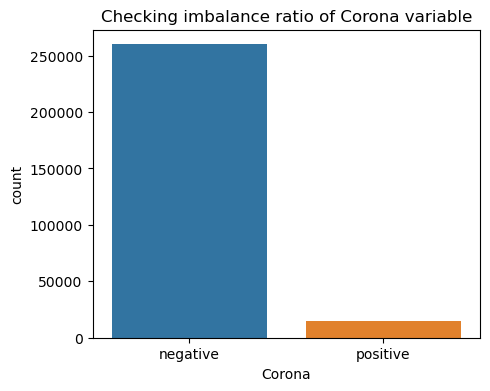

In [31]:
# checking the imbalance using countplot
plt.figure(figsize = [5,4])
sns.countplot(data=covid, x='Corona')
plt.title("Checking imbalance ratio of Corona variable")
plt.show()

#### Insight: 
From above we can see that above two classes are highly inbalanced.

In [32]:
# checking exact Corona Positive to Corona negative ratio
covid[covid.Corona=='negative'].shape[0]/covid[covid.Corona=='positive'].shape[0]

17.694841431876956

#### Insight:
From above we can say that  1 in every 17-18 patients is corona positive.

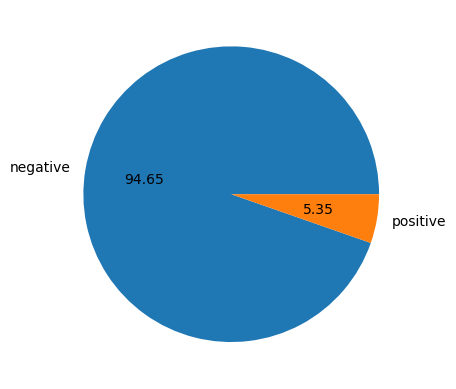

In [33]:
# percentage of corona patients.
plt.pie(covid['Corona'].value_counts(),labels = ['negative','positive'],autopct = "%0.2f")
plt.show()

#### Insight:
Our data is highly Imbalanced as 94.65% are covid negative and only 5.35% are covid positive.

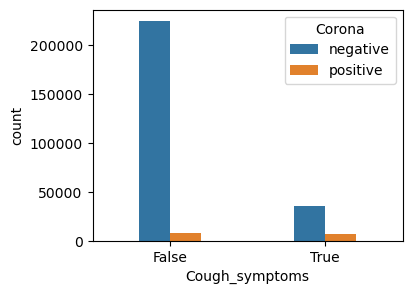

In [34]:
#univatiate analysis

plt.figure(figsize=(4,3))
sns.countplot(x='Cough_symptoms',hue='Corona',data=covid,width=0.4)
plt.show()

##### Insight:
There are signficant amount of patinet who have cough symptoms but are corona negative.

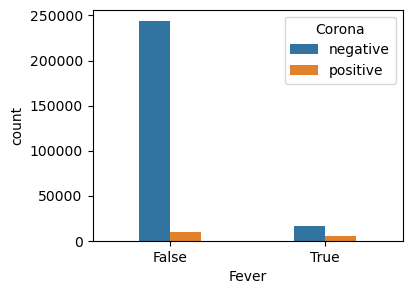

In [35]:
plt.figure(figsize=(4,3))
sns.countplot(x='Fever',hue='Corona',data=covid,width=0.4)
plt.show()

#### Insight:
There are significant number of patinet who dont have fever but are corona positive.

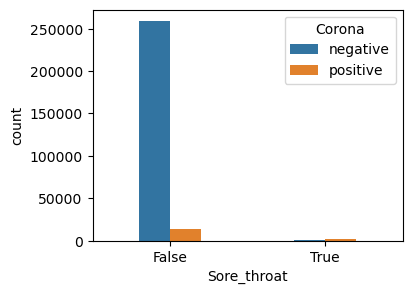

In [36]:
plt.figure(figsize=(4,3))
sns.countplot(x='Sore_throat',hue='Corona',data=covid,width=0.4)
plt.show()

#### Insight:
There are significant number of patients not having sore throat but are corona positive.

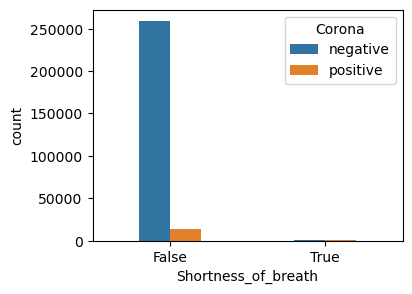

In [37]:
plt.figure(figsize=(4,3))
sns.countplot(x='Shortness_of_breath',hue='Corona',data=covid,width=0.4)
plt.show()

#### Insight:
There are significant number of patients not having shortness of breath but are corona positive.

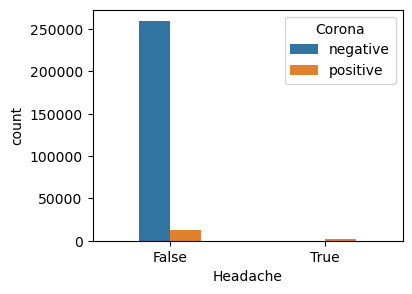

In [38]:
plt.figure(figsize=(4,3))
sns.countplot(x='Headache',hue='Corona',data=covid,width=0.4)
plt.show()

#### Insight:
There are significant amount of patients who dont have headache but are corona positive.

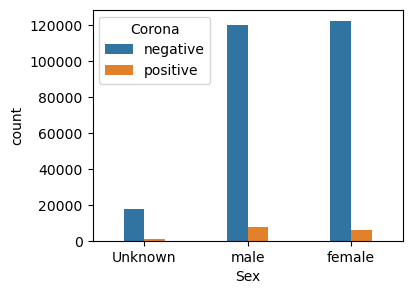

In [39]:
plt.figure(figsize=(4,3))
sns.countplot(x='Sex',hue='Corona',data=covid,width=0.4)
plt.show()

#### Insight:
from above plot we can see that their is slightly difference between number of corona positive male and female. 

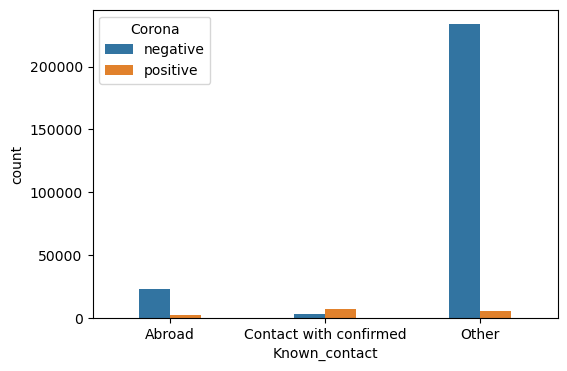

In [40]:
plt.figure(figsize=(6,4))
sns.countplot(x='Known_contact',hue='Corona',data=covid,width=0.4)
plt.show()

#### Insight:
There are significant amount of Corona Positive Patients have been in contact with other positive patients.

In [41]:
# save clean dataset
covid.to_csv("cleaned_data.csv",index = False)
pd.read_csv('cleaned_data.csv')

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,11-03-2020,True,False,True,False,False,negative,Unknown,Unknown,Abroad
1,11-03-2020,False,True,False,False,False,positive,Unknown,Unknown,Abroad
2,11-03-2020,False,True,False,False,False,positive,Unknown,Unknown,Abroad
3,11-03-2020,True,False,False,False,False,negative,Unknown,Unknown,Abroad
4,11-03-2020,True,False,False,False,False,negative,Unknown,Unknown,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...
274697,30-04-2020,False,False,False,False,False,positive,Unknown,male,Other
274698,30-04-2020,False,False,False,False,False,negative,Unknown,female,Other
274699,30-04-2020,False,False,False,False,False,negative,Unknown,male,Other
274700,30-04-2020,False,False,False,False,False,negative,Unknown,male,Other


- ## Feature Engineering

In [42]:
# convert all categorical column into numerical column
from sklearn.preprocessing import LabelEncoder

covid[['Cough_symptoms','Fever','Sore_throat','Shortness_of_breath','Headache','Corona','Age_60_above', 'Sex' , 'Known_contact']] = covid[['Cough_symptoms','Fever','Sore_throat','Shortness_of_breath','Headache','Corona','Age_60_above', 'Sex' , 'Known_contact']].apply(LabelEncoder().fit_transform)

In [43]:
covid

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,11-03-2020,1,0,1,0,0,0,1,0,0
1,11-03-2020,0,1,0,0,0,1,1,0,0
2,11-03-2020,0,1,0,0,0,1,1,0,0
3,11-03-2020,1,0,0,0,0,0,1,0,0
4,11-03-2020,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
278843,30-04-2020,0,0,0,0,0,1,1,2,2
278844,30-04-2020,0,0,0,0,0,0,1,1,2
278845,30-04-2020,0,0,0,0,0,0,1,2,2
278846,30-04-2020,0,0,0,0,0,0,1,2,2


In [44]:
# 'Cough_symptoms' (TRUE = 1 , FALSE = 0)
# 'FEVER' (TRUE = 1 , FALSE = 0)
# 'Sore_throat' (TRUE = 1 , FALSE = 0)
# 'Shortness_of_breath' (TRUE = 1 , FALSE = 0)
# 'Headache' (TRUE = 1 , FALSE = 0)
# Corona (Positive =1 , Negative = 0)
# Age_60_above (No=0 , Unknown = 1 , Yes = 2)
# Sex (Unknown=0, Female=1, Male=2)
# Known_contact (Abroad=0, Contact with confirmed = 1, other = 2)

- ## Examining Multicollinearity using VIF

In [45]:
# First Import variance_inflation_factor (VIF) from statsmodels
from statsmodels.stats.outliers_influence import variance_inflation_factor

data = covid[['Cough_symptoms','Fever','Sore_throat','Shortness_of_breath','Headache','Age_60_above','Sex','Known_contact']]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data['features'] = data.columns

# calculating VIF for each feature

vif_data['VIF'] = [variance_inflation_factor(data.values,i) for i in range(len(data.columns))]
print(vif_data)

              features       VIF
0       Cough_symptoms  1.553829
1                Fever  1.400507
2          Sore_throat  1.154474
3  Shortness_of_breath  1.080408
4             Headache  1.172620
5         Age_60_above  1.955016
6                  Sex  4.800908
7        Known_contact  4.805530


### Insight:
- The default VIF cutoff value is 5, only variables with a VIF less than 5 will be included in the model.
- VIF <= 5 is considered as considerable collinearity

- All the VIF value is less than 5. We can go with all the features

- ## Train/Test Split Based on Date

As per our business requirement, I am taking 11 March 2020 to 15 April 2020 as Training and validation set and 16 April 2020 to 30 April 2020 as Test Set.

In [46]:
#changing the datatype of Test_date from object to Datetime
covid['Test_date'] = pd.to_datetime(covid['Test_date'],format = '%d-%m-%Y')

In [47]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
Index: 274702 entries, 0 to 278847
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Test_date            274702 non-null  datetime64[ns]
 1   Cough_symptoms       274702 non-null  int32         
 2   Fever                274702 non-null  int32         
 3   Sore_throat          274702 non-null  int32         
 4   Shortness_of_breath  274702 non-null  int32         
 5   Headache             274702 non-null  int32         
 6   Corona               274702 non-null  int32         
 7   Age_60_above         274702 non-null  int32         
 8   Sex                  274702 non-null  int32         
 9   Known_contact        274702 non-null  int32         
dtypes: datetime64[ns](1), int32(9)
memory usage: 13.6 MB


In [48]:
# Breaking the data according to the date

break_date = pd.Timestamp('2020-04-15')
df_train = covid[covid['Test_date']<= break_date]
df_test = covid[covid['Test_date']> break_date]

In [49]:
# data from 11 march 2020 to 15th april 2020
df_train

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,2020-03-11,1,0,1,0,0,0,1,0,0
1,2020-03-11,0,1,0,0,0,1,1,0,0
2,2020-03-11,0,1,0,0,0,1,1,0,0
3,2020-03-11,1,0,0,0,0,0,1,0,0
4,2020-03-11,1,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
163184,2020-04-15,0,0,0,0,0,0,1,2,2
163185,2020-04-15,0,0,0,0,0,0,1,2,2
163186,2020-04-15,0,0,0,0,0,0,1,1,2
163187,2020-04-15,0,0,0,0,0,0,1,2,2


In [50]:
# data from 16th april 2020 to 30th april 2020
df_test

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
163189,2020-04-16,1,0,0,0,0,0,1,1,0
163190,2020-04-16,0,0,0,0,0,0,1,1,2
163191,2020-04-16,1,0,0,0,0,0,1,1,0
163192,2020-04-16,0,0,0,0,0,0,1,2,2
163193,2020-04-16,0,0,0,0,0,0,1,2,2
...,...,...,...,...,...,...,...,...,...,...
278843,2020-04-30,0,0,0,0,0,1,1,2,2
278844,2020-04-30,0,0,0,0,0,0,1,1,2
278845,2020-04-30,0,0,0,0,0,0,1,2,2
278846,2020-04-30,0,0,0,0,0,0,1,2,2


### Separating dataset into Training set, Test Set and Validation set

In [51]:
# dropping Test_date column and target column(Corona) from df_train and store it into X_train.
X_train  = df_train.drop(columns=['Test_date','Corona'],axis = 1)
X_train

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Age_60_above,Sex,Known_contact
0,1,0,1,0,0,1,0,0
1,0,1,0,0,0,1,0,0
2,0,1,0,0,0,1,0,0
3,1,0,0,0,0,1,0,0
4,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...
163184,0,0,0,0,0,1,2,2
163185,0,0,0,0,0,1,2,2
163186,0,0,0,0,0,1,1,2
163187,0,0,0,0,0,1,2,2


In [52]:
# storing targert variable in y_train.

y_train = df_train['Corona']
y_train

0         0
1         1
2         1
3         0
4         0
         ..
163184    0
163185    0
163186    0
163187    0
163188    0
Name: Corona, Length: 160463, dtype: int32

In [53]:
# dropping Test_date column and target column(Corona) from df_test and store it into X_test.
X_test = df_test.drop(columns = ['Test_date','Corona'],axis = 1)
X_test

,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Age_60_above,Sex,Known_contact
163189,1,0,0,0,0,1,1,0
163190,0,0,0,0,0,1,1,2
163191,1,0,0,0,0,1,1,0
163192,0,0,0,0,0,1,2,2
163193,0,0,0,0,0,1,2,2
...,...,...,...,...,...,...,...,...
278843,0,0,0,0,0,1,2,2
278844,0,0,0,0,0,1,1,2
278845,0,0,0,0,0,1,2,2
278846,0,0,0,0,0,1,2,2


In [54]:
# store target variable(Corona) of test set into y_test.
y_test = df_test['Corona']
print(y_test)

163189    0
163190    0
163191    0
163192    0
163193    0
         ..
278843    1
278844    0
278845    0
278846    0
278847    0
Name: Corona, Length: 114239, dtype: int32


In [55]:
# We have to divide X_train , y_train into Training Set and Validation in the ratio 4:1 which means 20%.

from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train,y_train, test_size=0.20,random_state=8)

In [56]:
# Training Set

print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))

# Test Set

print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

# Validation Set

print("X_val shape: {}".format(X_val.shape))
print("y_val shape: {}".format(y_val.shape))


X_train shape: (128370, 8)
y_train shape: (128370,)
X_test shape: (114239, 8)
y_test shape: (114239,)
X_val shape: (32093, 8)
y_val shape: (32093,)


- ## Feature Scaling

In [57]:
# performing transformation of data.

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_train

array([[-0.46628689, -0.31829508, -0.10862413, ..., -0.51991561,
        -0.5147289 ,  0.41672789],
       [ 2.14460242, -0.31829508, -0.10862413, ..., -0.51991561,
        -0.5147289 ,  0.41672789],
       [ 2.14460242, -0.31829508, -0.10862413, ..., -0.51991561,
        -0.5147289 ,  0.41672789],
       ...,
       [-0.46628689, -0.31829508, -0.10862413, ..., -0.51991561,
         0.99185482,  0.41672789],
       [-0.46628689, -0.31829508, -0.10862413, ..., -0.51991561,
         0.99185482,  0.41672789],
       [-0.46628689, -0.31829508, -0.10862413, ..., -0.51991561,
         0.99185482,  0.41672789]])

In [58]:
X_test = sc.fit_transform(X_test)
X_test

array([[ 2.80931852, -0.24666374, -0.01419059, ...,  0.        ,
        -0.87274486, -3.54845528],
       [-0.35595821, -0.24666374, -0.01419059, ...,  0.        ,
        -0.87274486,  0.29991548],
       [ 2.80931852, -0.24666374, -0.01419059, ...,  0.        ,
        -0.87274486, -3.54845528],
       ...,
       [-0.35595821, -0.24666374, -0.01419059, ...,  0.        ,
         1.01211411,  0.29991548],
       [-0.35595821, -0.24666374, -0.01419059, ...,  0.        ,
         1.01211411,  0.29991548],
       [-0.35595821, -0.24666374, -0.01419059, ...,  0.        ,
        -0.87274486,  0.29991548]])

- ## handle imbalanced data

In [59]:
y_train.value_counts()

Corona
0    118843
1      9527
Name: count, dtype: int64

In [60]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='minority')
X_train_oversample , y_train_oversample =sm.fit_resample(X_train,y_train)


X_train_oversample.shape
y_train_oversample.shape

(237686,)

In [61]:
y_train_oversample.value_counts()

Corona
0    118843
1    118843
Name: count, dtype: int64

Now the classes are balanced while training data.

- ## Building Algorithm

- ### 1.Logistic Regression

In [62]:
from sklearn.linear_model import LogisticRegression
### Creating a Logistic regression object
lr = LogisticRegression()
### Passing independant and dependant training data to the model
lr.fit(X_train_oversample,y_train_oversample)
print('Logistic Model Accuracy : ', lr.score(X_val, y_val)*100, '%')

Logistic Model Accuracy :  90.3717321534291 %


In [63]:
lr_pred=lr.predict(X_val)
print(lr_pred)

[0 0 0 ... 0 0 0]


In [64]:
from sklearn.metrics import accuracy_score
print("Train accuracy of Logistic Regression is", lr.score(X_train_oversample, y_train_oversample))
print("Accuracy (val) score of Logistic Regression is", lr.score(X_val, y_val))
print("Accuracy (val) score of Logistic Regression is", accuracy_score(y_val, lr_pred))

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_val, lr_pred))
cm= confusion_matrix(y_val, lr_pred)
print(confusion_matrix(y_val, lr_pred))

Train accuracy of Logistic Regression is 0.7638523093493096
Accuracy (val) score of Logistic Regression is 0.903717321534291
Accuracy (val) score of Logistic Regression is 0.903717321534291
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     29624
           1       0.27      0.15      0.20      2469

    accuracy                           0.90     32093
   macro avg       0.60      0.56      0.57     32093
weighted avg       0.88      0.90      0.89     32093

[[28626   998]
 [ 2092   377]]


In [66]:
### hyper parameter tuning for logistic regression using GridSearchCV
# create parameter grid:
from sklearn.model_selection import GridSearchCV
lrc = LogisticRegression()
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]
# Create GridSearchCV object
clf = GridSearchCV(lrc, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)
 
# Fit the model
best_clf = clf.fit(X_train_oversample,y_train_oversample)
 
# Print best parameters and best score
print("Best Parameters:", best_clf.best_estimator_)
print("Best Score:", best_clf.best_score_)


Fitting 3 folds for each of 80 candidates, totalling 240 fits
Best Parameters: LogisticRegression(penalty='l1', solver='liblinear')
Best Score: 0.763848109915644


In [67]:
log_best = LogisticRegression(**best_clf.best_params_)
log_best.fit(X_train_oversample,y_train_oversample)


LogisticRegression(penalty='l1', solver='liblinear')

In [68]:
log_pred2=log_best.predict(X_val)
score_log=accuracy_score(y_val,log_pred2)
score_log

0.903717321534291

In [69]:
from sklearn.metrics import accuracy_score
print("Train accuracy of Logistic Regression is", log_best.score(X_train_oversample, y_train_oversample))
print("Accuracy (val) score of Logistic Regression is", log_best.score(X_val, y_val))
print("Accuracy (val) score of Logistic Regression is", accuracy_score(y_val, log_pred2))

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_val, log_pred2))
cm= confusion_matrix(y_val, log_pred2)
print(confusion_matrix(y_val, log_pred2))

Train accuracy of Logistic Regression is 0.7638523093493096
Accuracy (val) score of Logistic Regression is 0.903717321534291
Accuracy (val) score of Logistic Regression is 0.903717321534291
              precision    recall  f1-score   support

           0       0.93      0.97      0.95     29624
           1       0.27      0.15      0.20      2469

    accuracy                           0.90     32093
   macro avg       0.60      0.56      0.57     32093
weighted avg       0.88      0.90      0.89     32093

[[28626   998]
 [ 2092   377]]


### 2 Naive bayse classifier

In [72]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()

nb_model.fit(X_train,y_train)
print(' Naive Bayes classifier is :',nb_model.score(X_val,y_val)*100,'%')

 Naive Bayes classifier is : 93.02340074159474 %


In [74]:
nb_pred=nb_model.predict(X_val)
print(nb_pred)

[0 0 0 ... 0 0 0]


In [76]:
from sklearn.metrics import accuracy_score
print("Train accuracy of Naive Bayes classifier  is", nb_model.score(X_train_oversample, y_train_oversample))
print("Accuracy (val) score of Naive Bayes classifier is", nb_model.score(X_val, y_val))
print("Accuracy (val) score of Naive Bayes classifier  is", accuracy_score(y_val, nb_pred))

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_val, nb_pred))
cm= confusion_matrix(y_val, nb_pred)
print(confusion_matrix(y_val, nb_pred))

Train accuracy of Naive Bayes classifier  is 0.6538963169896418
Accuracy (val) score of Naive Bayes classifier is 0.9302340074159474
Accuracy (val) score of Naive Bayes classifier  is 0.9302340074159474
              precision    recall  f1-score   support

           0       0.93      1.00      0.96     29624
           1       0.95      0.10      0.18      2469

    accuracy                           0.93     32093
   macro avg       0.94      0.55      0.57     32093
weighted avg       0.93      0.93      0.90     32093

[[29610    14]
 [ 2225   244]]


In [ ]:
# no hyper parameter tuninf for naive bayse classifier.

### 3.Random Forest Classifier

In [85]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train_oversample,y_train_oversample)
print('Random Forest Classifier : ', rf.score(X_val, y_val)*100, '%')

Random Forest Classifier :  72.36780606362758 %


In [86]:
rf_pred=rf.predict(X_val)
print(rf_pred)

[1 0 0 ... 0 1 0]


In [87]:
from sklearn.metrics import accuracy_score
print("Train accuracy of Random Forest  is", rf.score(X_train_oversample, y_train_oversample))
print("Accuracy (val) score of Random Forest is", rf.score(X_val, y_val))
print("Accuracy (val) score ofRandom Forest  is", accuracy_score(y_val, rf_pred))

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_val, rf_pred))
cm= confusion_matrix(y_val, rf_pred)
print(confusion_matrix(y_val, rf_pred))

Train accuracy of Random Forest  is 0.8675479414016812
Accuracy (val) score of Random Forest is 0.7236780606362758
Accuracy (val) score ofRandom Forest  is 0.7236780606362758
              precision    recall  f1-score   support

           0       0.95      0.74      0.83     29624
           1       0.15      0.58      0.24      2469

    accuracy                           0.72     32093
   macro avg       0.55      0.66      0.54     32093
weighted avg       0.89      0.72      0.79     32093

[[21804  7820]
 [ 1048  1421]]


In [88]:
# hyper parameter tuning for random forest
from sklearn.metrics import accuracy_score,make_scorer
from sklearn.model_selection import GridSearchCV
rfc = RandomForestClassifier(random_state=42)
param_grid = {'n_estimators': [50, 100, 200],
              'max_depth': [5, 10, 15, 20, None],
              'max_features': ['sqrt', 'log2'],
              'bootstrap': [True, False]}


scorer = make_scorer(accuracy_score)

clf = GridSearchCV(rfc, param_grid, scoring=scorer)
best_clf = clf.fit(X_train_oversample, y_train_oversample)
print("Best Parameters:", best_clf.best_estimator_)
print("Best Score:", best_clf.best_score_)

Best Parameters: RandomForestClassifier(max_depth=20, n_estimators=50, random_state=42)
Best Score: 0.8672323997992072


In [90]:
# Training the model using the best hyperparameters.
rfc_best = RandomForestClassifier(max_depth=20, n_estimators=50, random_state=42)
rfc_best.fit(X_train_oversample, y_train_oversample)
print('Random Forest Classifier : ', rfc_best.score(X_val, y_val)*100, '%')

Random Forest Classifier :  74.49911195587823 %


In [91]:
rfc_pred2 = rfc_best.predict(X_val)
score_rfc=accuracy_score(y_val,rfc_pred2)
score_rfc

0.7449911195587823

In [92]:
# performance measures for random forest
from sklearn.metrics import accuracy_score
print("Train accuracy of Random Forest  is", rfc_best.score(X_train_oversample, y_train_oversample))
print("Accuracy (val) score of Random Forest  is", rfc_best.score(X_val, y_val))
print("Accuracy (val) score of Random Forest  is", accuracy_score(y_val, rfc_pred2))

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_val, rfc_pred2))
cm= confusion_matrix(y_val, rfc_pred2)
print(confusion_matrix(y_val, rfc_pred2))

Train accuracy of Random Forest  is 0.8675479414016812
Accuracy (val) score of Random Forest  is 0.7449911195587823
Accuracy (val) score of Random Forest  is 0.7449911195587823
              precision    recall  f1-score   support

           0       0.95      0.76      0.85     29624
           1       0.16      0.57      0.25      2469

    accuracy                           0.74     32093
   macro avg       0.56      0.66      0.55     32093
weighted avg       0.89      0.74      0.80     32093

[[22509  7115]
 [ 1069  1400]]


### 4. Decision tree classifier

In [62]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train_oversample,y_train_oversample)
print('Decision tree classifier : ', dt.score(X_val, y_val)*100, '%')

Decision tree classifier :  14.249213224067553 %


In [63]:
dt_pred=dt.predict(X_val)
print(dt_pred)

[1 1 1 ... 1 1 1]


In [64]:
from sklearn.metrics import accuracy_score
print("Train accuracy of Decision tree classifier is", dt.score(X_train_oversample, y_train_oversample))
print("Accuracy (val) score of Decision tree classifieris", dt.score(X_val, y_val))
print("Accuracy (val) score of Decision tree classifier  is", accuracy_score(y_val, dt_pred))

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_val, dt_pred))
cm= confusion_matrix(y_val, dt_pred)
print(confusion_matrix(y_val, dt_pred))

Train accuracy of Decision tree classifier is 0.8675479414016812
Accuracy (val) score of Decision tree classifieris 0.14249213224067553
Accuracy (val) score of Decision tree classifier  is 0.14249213224067553
              precision    recall  f1-score   support

           0       0.96      0.07      0.14     29624
           1       0.08      0.96      0.15      2469

    accuracy                           0.14     32093
   macro avg       0.52      0.52      0.14     32093
weighted avg       0.89      0.14      0.14     32093

[[ 2196 27428]
 [   92  2377]]


In [68]:
# hyper parameter tuning for Decision tree classifier
from sklearn.metrics import make_scorer
from sklearn.model_selection import GridSearchCV
dtc = DecisionTreeClassifier(random_state=42)

param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

scorer = make_scorer(accuracy_score)

clf = GridSearchCV(dtc, param_grid=param_grid, scoring=scorer, cv=5)
best_clf = clf.fit(X_train_oversample, y_train_oversample)
print('Best parameters:', best_clf.best_params_)
print("Best Score:", best_clf.best_score_)

Best parameters: {'max_depth': 9, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best Score: 0.8667443602322891


In [70]:
# Training the model using the best hyperparameters.
dtc_best = DecisionTreeClassifier(max_depth =  9, min_samples_leaf= 2, min_samples_split = 2)
dtc_best.fit(X_train_oversample, y_train_oversample)
print('Decision tree classifier : ', dtc_best.score(X_val, y_val)*100, '%')

Decision tree classifier :  19.76443461190914 %


In [71]:
dtc_pred2 = dtc_best.predict(X_val)
score_dtc=accuracy_score(y_val,dtc_pred2)
score_dtc

0.1976443461190914

In [72]:
from sklearn.metrics import accuracy_score
print("Train accuracy of  Decision tree classifier  is", dtc_best.score(X_train_oversample, y_train_oversample))
print("Accuracy (val) score of Decision tree classifier is", dtc_best.score(X_val, y_val))
print("Accuracy (val) score of Decision tree classifier is", accuracy_score(y_val, dtc_pred2))

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_val, dtc_pred2))
cm= confusion_matrix(y_val, dtc_pred2)
print(confusion_matrix(y_val, dtc_pred2))

Train accuracy of  Decision tree classifier  is 0.8670220374780172
Accuracy (val) score of Decision tree classifier is 0.1976443461190914
Accuracy (val) score of Decision tree classifier is 0.1976443461190914
              precision    recall  f1-score   support

           0       0.95      0.14      0.24     29624
           1       0.08      0.92      0.15      2469

    accuracy                           0.20     32093
   macro avg       0.52      0.53      0.20     32093
weighted avg       0.89      0.20      0.23     32093

[[ 4068 25556]
 [  194  2275]]


### 5.Adaboost classifier



In [77]:
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier()
adaboost.fit( X_train_oversample,y_train_oversample)
print('Adaboost classifier : ', adaboost.score(X_val, y_val)*100, '%')

Adaboost classifier :  84.02766958526782 %


In [78]:
ada_pred=adaboost.predict(X_val)
print(ada_pred)

[0 0 0 ... 0 1 0]


In [79]:
from sklearn.metrics import accuracy_score
print("Train accuracy of Adaboost classifier is", adaboost.score(X_train_oversample, y_train_oversample))
print("Accuracy (val) score of Adaboost  classifier is", adaboost.score(X_val, y_val))
print("Accuracy (val) score of Adaboost  classifier  is", accuracy_score(y_val, ada_pred))

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_val, ada_pred))
cm= confusion_matrix(y_val, ada_pred)
print(confusion_matrix(y_val, ada_pred))

Train accuracy of Adaboost classifier is 0.8472817077993655
Accuracy (val) score of Adaboost  classifier is 0.8402766958526782
Accuracy (val) score of Adaboost  classifier  is 0.8402766958526782
              precision    recall  f1-score   support

           0       0.93      0.90      0.91     29624
           1       0.11      0.16      0.13      2469

    accuracy                           0.84     32093
   macro avg       0.52      0.53      0.52     32093
weighted avg       0.86      0.84      0.85     32093

[[26577  3047]
 [ 2079   390]]


In [80]:
# hyper parameter tuning for Adaboost classifier
from sklearn.model_selection import GridSearchCV
adac =AdaBoostClassifier()
adaboost_params = {'n_estimators': [50, 100, 200],
                   'learning_rate': [0.1, 0.01, 0.001]}

clf = GridSearchCV(adac, adaboost_params, cv=5)
best_clf = clf.fit(X_train_oversample, y_train_oversample)

print("Best Hyperparameters for AdaBoost: ", best_clf.best_params_)
print("Best Score:", best_clf.best_score_)

Best Hyperparameters for AdaBoost:  {'learning_rate': 0.1, 'n_estimators': 200}
Best Score: 0.8455146687640571


In [81]:
# Training the model using the best hyperparameters.
ada_best = AdaBoostClassifier(learning_rate = 0.1, n_estimators = 200)
ada_best.fit(X_train_oversample, y_train_oversample)
print('Adaboost classifier : ', ada_best.score(X_val, y_val)*100, '%')

Adaboost classifier :  84.02766958526782 %


In [82]:
ada_pred2 = ada_best.predict(X_val)
score_ada=accuracy_score(y_val,ada_pred2)
score_ada

0.8402766958526782

In [83]:
from sklearn.metrics import accuracy_score
print("Train accuracy of  Adaboost classifier  is", ada_best.score(X_train_oversample, y_train_oversample))
print("Accuracy (val) score of Adaboost classifier is", ada_best.score(X_val, y_val))
print("Accuracy (val) score of Adaboost classifier is", accuracy_score(y_val, ada_pred2))

from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_val, ada_pred2))
cm= confusion_matrix(y_val, ada_pred2)
print(confusion_matrix(y_val, ada_pred2))

Train accuracy of  Adaboost classifier  is 0.8448877931388471
Accuracy (val) score of Adaboost classifier is 0.8402766958526782
Accuracy (val) score of Adaboost classifier is 0.8402766958526782
              precision    recall  f1-score   support

           0       0.93      0.90      0.91     29624
           1       0.11      0.16      0.13      2469

    accuracy                           0.84     32093
   macro avg       0.52      0.53      0.52     32093
weighted avg       0.86      0.84      0.85     32093

[[26577  3047]
 [ 2079   390]]


# conclusion :

From above we can see that Random forest classifier is giving good training accuracy of 0.8672323997992072 i.e 86.72% with these hyperparameters (max_depth=20, n_estimators=50, random_state=42) and testing accuracy 0.7449 i.e 74.49% of  after hyper parameter tuning so we use this model for our problem.

# SQL Analysis:

In [ ]:
Use MySQL or PyMySQL to perform the below queries.

In [89]:
pip install duckdb pandas

Note: you may need to restart the kernel to use updated packages.


In [71]:
data = pd.read_csv('cleaned_data.csv')

In [105]:
# convet date column datatype from object to date type.
from datetime import datetime
data['Test_date'] = pd.to_datetime(data['Test_date'], format="%d-%m-%Y")


In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 274702 entries, 0 to 274701
Data columns (total 10 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   Test_date            274702 non-null  datetime64[ns]
 1   Cough_symptoms       274702 non-null  bool          
 2   Fever                274702 non-null  bool          
 3   Sore_throat          274702 non-null  bool          
 4   Shortness_of_breath  274702 non-null  bool          
 5   Headache             274702 non-null  bool          
 6   Corona               274702 non-null  object        
 7   Age_60_above         274702 non-null  object        
 8   Sex                  274702 non-null  object        
 9   Known_contact        274702 non-null  object        
dtypes: bool(5), datetime64[ns](1), object(4)
memory usage: 11.8+ MB


In [107]:
import duckdb

In [108]:
conn = duckdb.connect()

In [109]:
conn.register("data",data)

In [110]:
display(conn.execute('SHOW TABLES').df())

,name
0,data


In [111]:
df = conn.execute(
         "SELECT * FROM data ").df()

df

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,2020-03-11,True,False,True,False,False,negative,Unknown,Unknown,Abroad
1,2020-03-11,False,True,False,False,False,positive,Unknown,Unknown,Abroad
2,2020-03-11,False,True,False,False,False,positive,Unknown,Unknown,Abroad
3,2020-03-11,True,False,False,False,False,negative,Unknown,Unknown,Abroad
4,2020-03-11,True,False,False,False,False,negative,Unknown,Unknown,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...
274697,2020-04-30,False,False,False,False,False,positive,Unknown,male,Other
274698,2020-04-30,False,False,False,False,False,negative,Unknown,female,Other
274699,2020-04-30,False,False,False,False,False,negative,Unknown,male,Other
274700,2020-04-30,False,False,False,False,False,negative,Unknown,male,Other


In [ ]:
# 1.Find the number of corona patients who faced shortness of breath.

In [112]:
df = conn.execute("SELECT count(*) as 'shortness_of_breath' FROM data WHERE Shortness_of_breath = 'True' ").df()
df

,shortness_of_breath
0,1546


In [ ]:
# 2.Find the number of negative corona patients who have fever and sore_throat.

In [113]:
df = conn.execute(" SELECT COUNT(*) FROM  data WHERE Fever = 'True' AND Sore_throat = 'True' AND Corona = 'negative' ") .df()
df

,count_star()
0,121


In [114]:
# 3. Group the data by month and rank the number of positive cases.
df = conn.execute("SELECT month(Test_date) AS 'Month', COUNT(*) AS 'Number of positive cases' FROM data WHERE Corona = 'positive' GROUP BY Month ORDER BY COUNT(*) DESC" ).df()
df

,Month,Number of positive cases
0,4,8862
1,3,5832


In [ ]:
# 4. Find the female negative corona patients who faced cough and headache.

In [81]:
df = conn.execute("SELECT * FROM data WHERE Sex = 'female' AND Cough_symptoms = 'True' AND Headache = 'True' AND Corona = 'negative'").df()
df

,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,22-03-2020,True,True,True,False,True,negative,No,female,Abroad
1,22-03-2020,True,True,True,False,True,negative,No,female,Abroad
2,23-03-2020,True,False,True,False,True,negative,No,female,Abroad
3,23-03-2020,True,True,False,False,True,negative,No,female,Other
4,23-03-2020,True,False,True,True,True,negative,No,female,Contact with confirmed
5,23-03-2020,True,True,False,False,True,negative,Yes,female,Abroad
6,23-03-2020,True,True,False,False,True,negative,No,female,Contact with confirmed
7,27-03-2020,True,True,True,True,True,negative,No,female,Contact with confirmed
8,27-03-2020,True,False,False,True,True,negative,No,female,Contact with confirmed
9,27-03-2020,True,True,False,False,True,negative,No,female,Contact with confirmed


In [ ]:
# 5.How many elderly corona patients have faced breathing problems?

In [121]:
df = conn.execute("SELECT COUNT(*) FROM data WHERE Age_60_above = 'Yes' AND Shortness_of_breath = 'True' AND Corona = 'positive'").df()
df

,count_star()
0,262
